In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rng
from math import sqrt, acos, floor, sin

In [37]:
image = cv2.imread("./dataset/10 ชาติชาย raptor pre op LDFA MPTA  Drawing4.jpg", cv2.IMREAD_GRAYSCALE)

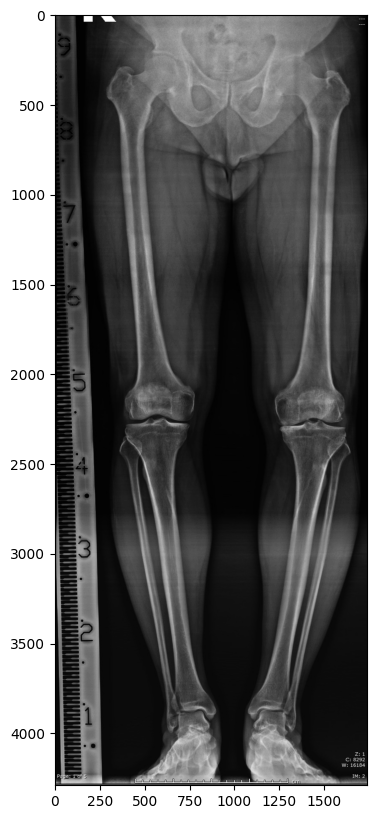

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(image, cmap="gray")

In [39]:
image.shape

(4290, 1740)

In [40]:
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# clahe_img = clahe.apply(image)

# gamma = 1.5
# gamma_corrected = np.uint8(cv2.pow(image/255.0, gamma) * 255.0)

# plt.figure(figsize=(10,10))
# plt.imshow(clahe_img, cmap="gray")

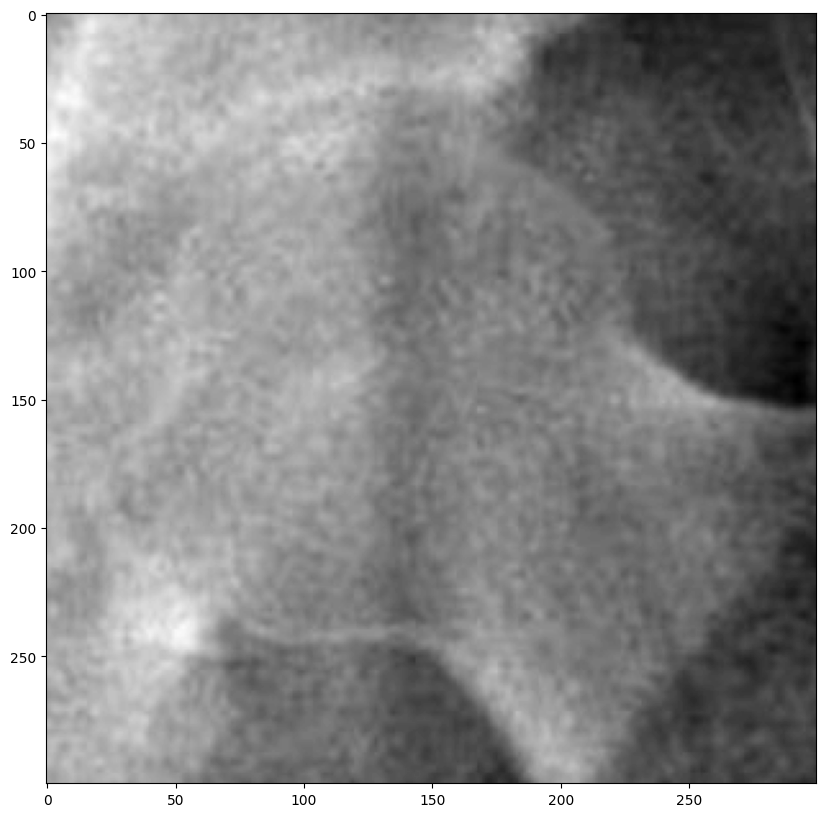

In [41]:
hip = image[200:500, 1200:1500]

plt.figure(figsize=(10,10))
plt.imshow(hip, cmap="gray")

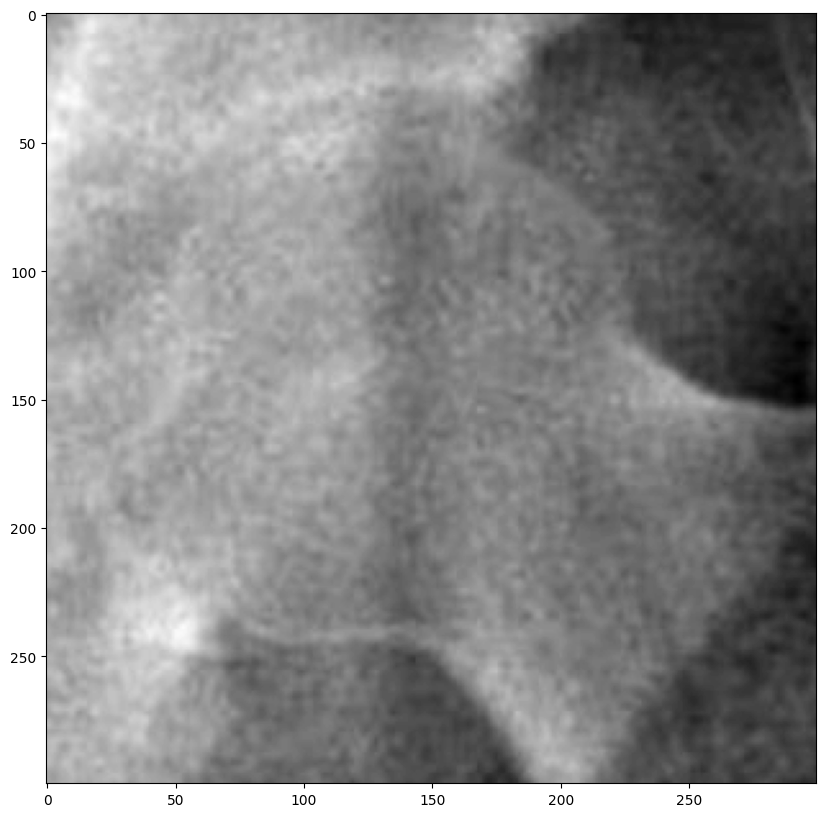

In [42]:
min_val = np.min(hip)
max_val = np.max(hip)
mult = 255 / (max_val-min_val)
norm_hip = hip - (min_val)
norm_hip = norm_hip*mult
# norm_hip = np.clip(norm_hip, 0, 255)

norm_hip = np.uint8(norm_hip)


plt.figure(figsize=(10,10))
plt.imshow(norm_hip, cmap="gray")

In [43]:
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(25,25)) # 10.0 , 25 25
# cl1 = clahe.apply(norm_hip)

# plt.figure(figsize=(10,10))
# plt.imshow(cl1, cmap="gray")

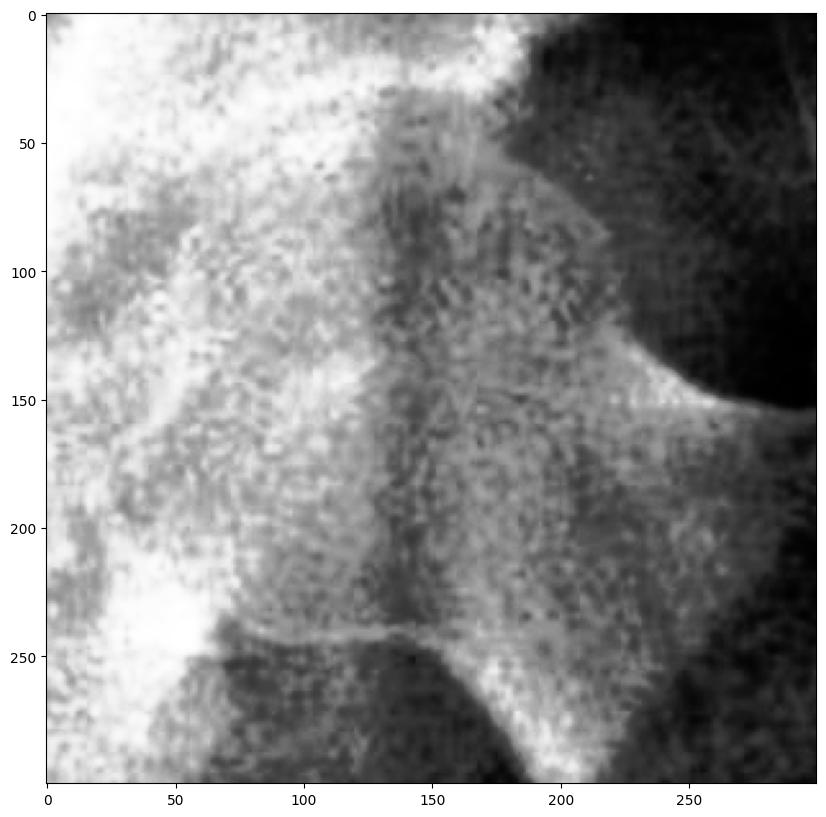

In [44]:
his = cv2.equalizeHist(norm_hip)

plt.figure(figsize=(10,10))
plt.imshow(his, cmap="gray")

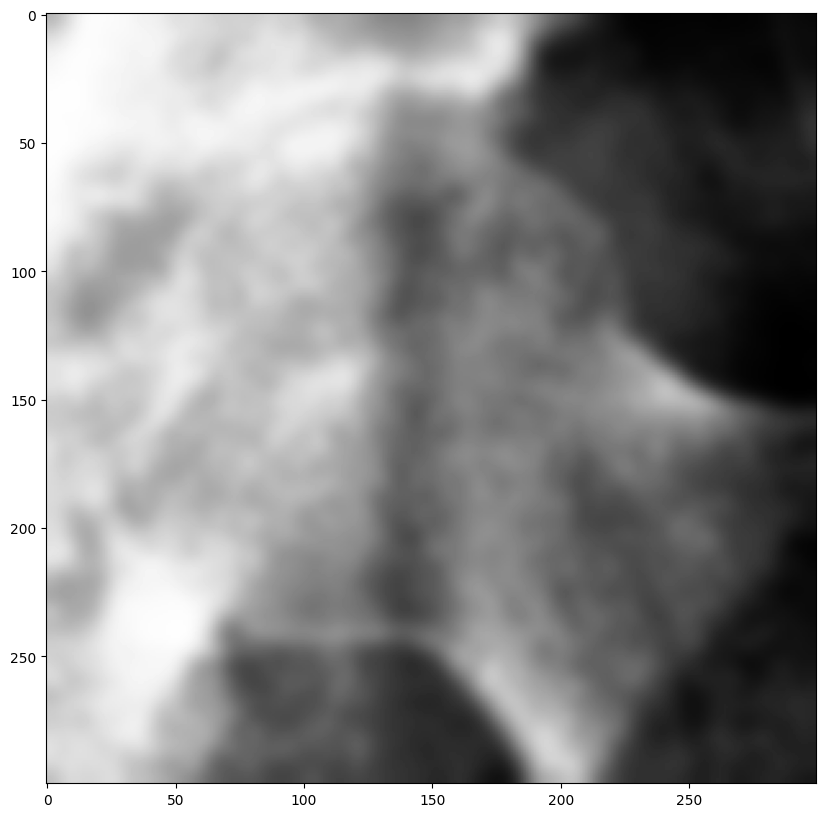

In [45]:
blur = cv2.GaussianBlur(his,(21,21),0)


plt.figure(figsize=(10,10))
plt.imshow(blur, cmap="gray")

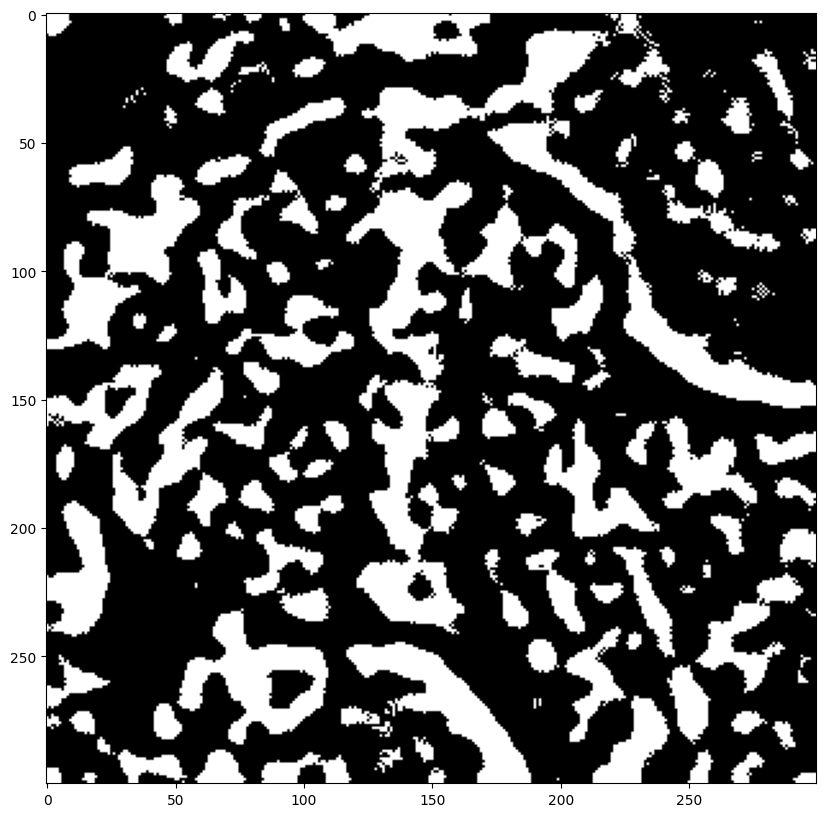

In [46]:
th = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,25,2) # 25 , 2

plt.figure(figsize=(10,10))
plt.imshow(th, cmap="gray")

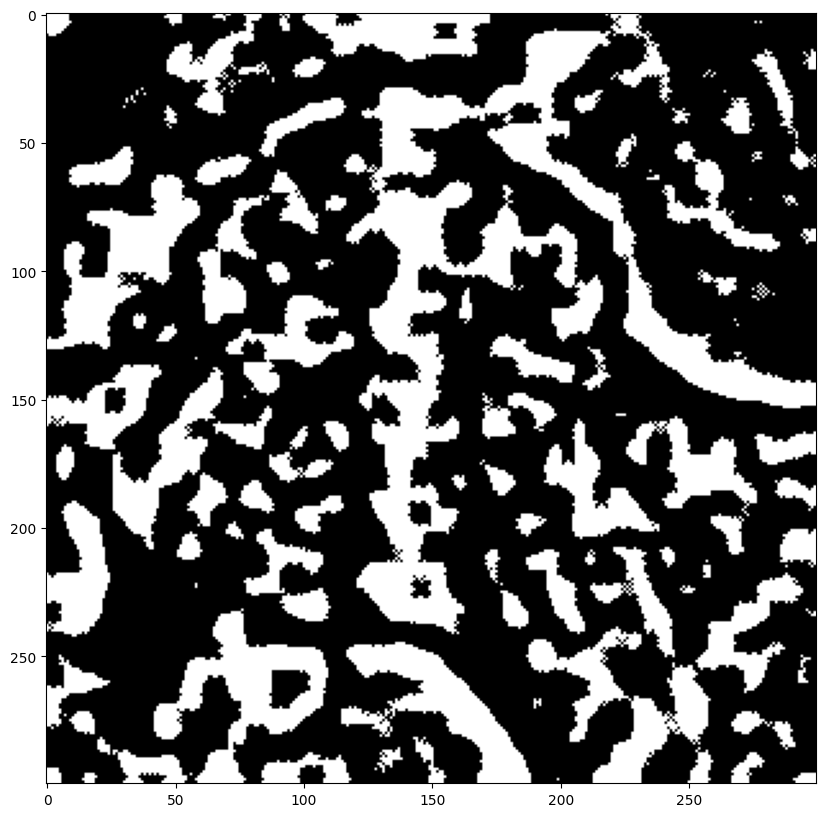

In [47]:
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
kernel = np.array([[1,0,0,0,1],[0,1,0,1,0],[0,0,1,0,0],[0,1,0,1,0],[1,0,0,0,1]], dtype=np.uint8)
th_morph = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel, iterations=1)

plt.figure(figsize=(10,10))
plt.imshow(th_morph, cmap="gray")

In [48]:
contour, _ = cv2.findContours(th_morph.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [49]:
def getTopN(all_contour, n):
    area = []
    for idx in range(len(all_contour)):
        temp_area = cv2.contourArea(contour[idx])
        area.append([idx, temp_area])
    area.sort(key=lambda x: x[1], reverse=True)
    result = [ i[0] for i in area[:n]]
    return result

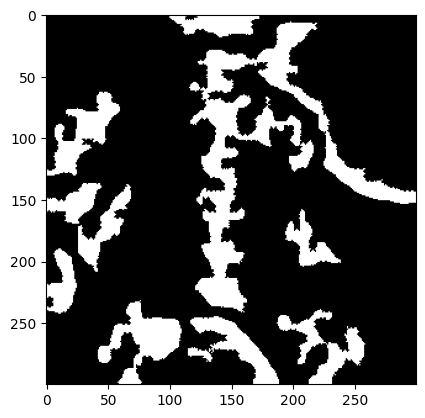

In [50]:
# img2 = th_morph.copy()
filter_contour = np.zeros(hip.shape, dtype=np.uint8)
selected_contour = getTopN(contour, 10)
for idx in range(len(contour)):
    color = (255,0,0)
    # Calculates the bounding rectangle of a contour
    x, y, w, h = cv2.boundingRect(contour[idx])
    if(not idx in selected_contour):
        # img2[y:y+h, x:x+w] = 0
        continue
    cv2.drawContours(filter_contour, contour, idx, color, thickness=-1)
    # cv2.rectangle(img2,(x,y),(x+w,y+h),color,3)
plt.imshow(filter_contour, cmap="gray")

In [51]:
# def intersectionArea(X1, Y1, R1, X2, Y2, R2) :

#     Pi = 3.14
    
#     # Calculate the euclidean distance
#     # between the two points
#     d = sqrt(((X2 - X1) * (X2 - X1)) + ((Y2 - Y1) * (Y2 - Y1)))

#     if (d > R1 + R2) :
#         ans = 0

#     elif (d <= (R1 - R2) and R1 >= R2) :
#         ans = floor(Pi * R2 * R2)

#     elif (d <= (R2 - R1) and R2 >= R1) :
#         ans = floor(Pi * R1 * R1)

#     else :
#         alpha = acos(((R1 * R1) + (d * d) - (R2 * R2)) / (2 * R1 * d)) * 2
#         beta = acos(((R2 * R2) + (d * d) - (R1 * R1)) / (2 * R2 * d)) * 2
        
#         a1 = (0.5 * beta * R2 * R2 ) - (0.5 * R2 * R2 * sin(beta))
#         a2 = (0.5 * alpha * R1 * R1) - (0.5 * R1 * R1 * sin(alpha))
#         ans = floor(a1 + a2)

#     return ans

In [52]:
def IOU(X1, Y1, R1, X2, Y2, R2) :

    Pi = 3.14
    
    # Calculate the euclidean distance
    # between the two points
    d = sqrt(((X2 - X1) * (X2 - X1)) + ((Y2 - Y1) * (Y2 - Y1)))

    area_1 = Pi * (R1 ** 2)
    area_2 = Pi * (R2 ** 2)

    if (d > R1 + R2) :
        intersect = 0

    elif (d <= (R1 - R2) and R1 >= R2) :
        intersect = floor(Pi * R2 * R2)

    elif (d <= (R2 - R1) and R2 >= R1) :
        intersect = floor(Pi * R1 * R1)

    else :
        alpha = acos(((R1 * R1) + (d * d) - (R2 * R2)) / (2 * R1 * d)) * 2
        beta = acos(((R2 * R2) + (d * d) - (R1 * R1)) / (2 * R2 * d)) * 2
        
        a1 = (0.5 * beta * R2 * R2 ) - (0.5 * R2 * R2 * sin(beta))
        a2 = (0.5 * alpha * R1 * R1) - (0.5 * R1 * R1 * sin(alpha))
        intersect = floor(a1 + a2)
    
    union = area_1 + area_2 - intersect

    ans = intersect / union

    return ans

In [53]:
def filter_circle(all_circles):
    if(len(all_circles[0]) == 1):
        return [0]
    intersect = []
    for i in all_circles[0]:
        mean_intersect = []
        for j in all_circles[0]:
            if(sum(i != j) != 0):
                mean_intersect.append(IOU(i[0],i[1],i[2],j[0],j[1],j[2]))
        if(len(mean_intersect) == 0):
            intersect.append(0)
        else:
            intersect.append(sum(mean_intersect)/len(mean_intersect))
    idx = []
    thres = max(intersect) * 0.9
    for i in range(len(intersect)):
        if(intersect[i] >  thres):
            idx.append(i)
    return idx

In [54]:
def filter_oob_circle(all_circles, width, height):
    filter_circle = []
    for i in all_circles[0]:
        x, y, r = i
        if(x+r > width + (0.1*r) or x-r < (-0.1*r)):
            # print("x",x+r, x-r)
            continue
        elif(y+r > height + (0.1*r) or y-r < (-0.1*r)):
            # print("y",y+r, y-r)
            continue
        filter_circle.append(i)
    filter_circle = np.array(filter_circle)
    filter_circle = np.expand_dims(filter_circle, axis=0)
    return filter_circle

In [55]:
def find_circle(hip_image, theshold_image):
    iter = 1
    circles = cv2.HoughCircles(theshold_image,cv2.HOUGH_GRADIENT,1,1,param1=20,param2=iter,minRadius=97,maxRadius=110)
    while len(circles[0]) > 5:
        iter += 1
        circles = cv2.HoughCircles(theshold_image,cv2.HOUGH_GRADIENT,1,1,param1=20,param2=iter,minRadius=97,maxRadius=110)
        if(str(type(circles)) == "<class 'NoneType'>"):
            break
    if(str(type(circles)) == "<class 'NoneType'>"):
        iter -= 1
        circles = cv2.HoughCircles(theshold_image,cv2.HOUGH_GRADIENT,1,1,param1=20,param2=iter,minRadius=97,maxRadius=110)
    oob_circles = filter_oob_circle(circles, hip.shape[1], hip.shape[0])
    print(oob_circles)
    select_idx = filter_circle(oob_circles)
    print(select_idx)
    new_circles = []
    for i in select_idx:
        new_circles.append(oob_circles[0][i])
    new_circles = np.array(new_circles)
    new_circles = np.expand_dims(new_circles, axis=0)
    print(new_circles.shape)
    print(iter)
    center = np.mean(new_circles[0], axis=0)
    center = np.uint16(np.around(center))

    cimg = hip_image.copy()
    cimg = cv2.cvtColor(cimg, cv2.COLOR_GRAY2RGB)
    cv2.circle(cimg,(center[0],center[1]),center[2],(255,0,0),2)
    cv2.circle(cimg,(center[0],center[1]),2,(255,0,0),3)
    print((center[0],center[1]))
    print("r", center[2])
    plt.figure(figsize=(10,10))
    plt.imshow(cimg)

    cimg = theshold_image.copy()
    cv2.circle(cimg,(center[0],center[1]),center[2],(255,255,0),2)
    cv2.circle(cimg,(center[0],center[1]),2,(255,255,0),3)
    plt.figure(figsize=(10,10))
    plt.imshow(cimg)

[[[127.5 147.5 109.4]
  [133.5 153.5 106.1]
  [143.5 151.5 101.7]
  [159.5 174.5 103.9]
  [111.5 135.5 106.1]]]
[0, 1, 2]
(1, 3, 3)
7
(135, 151)
r 106


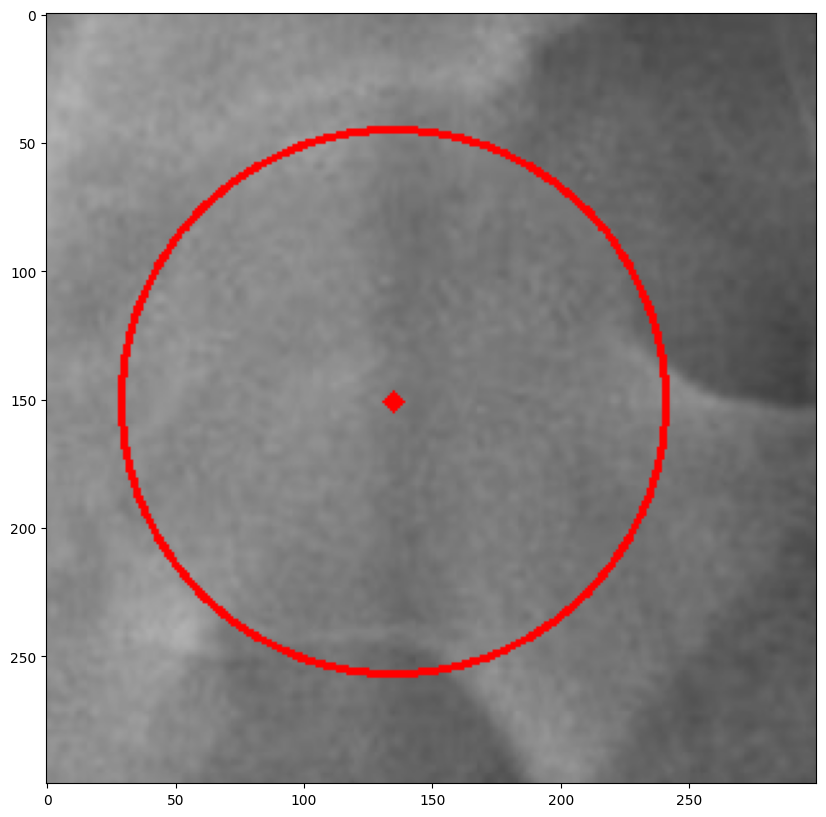

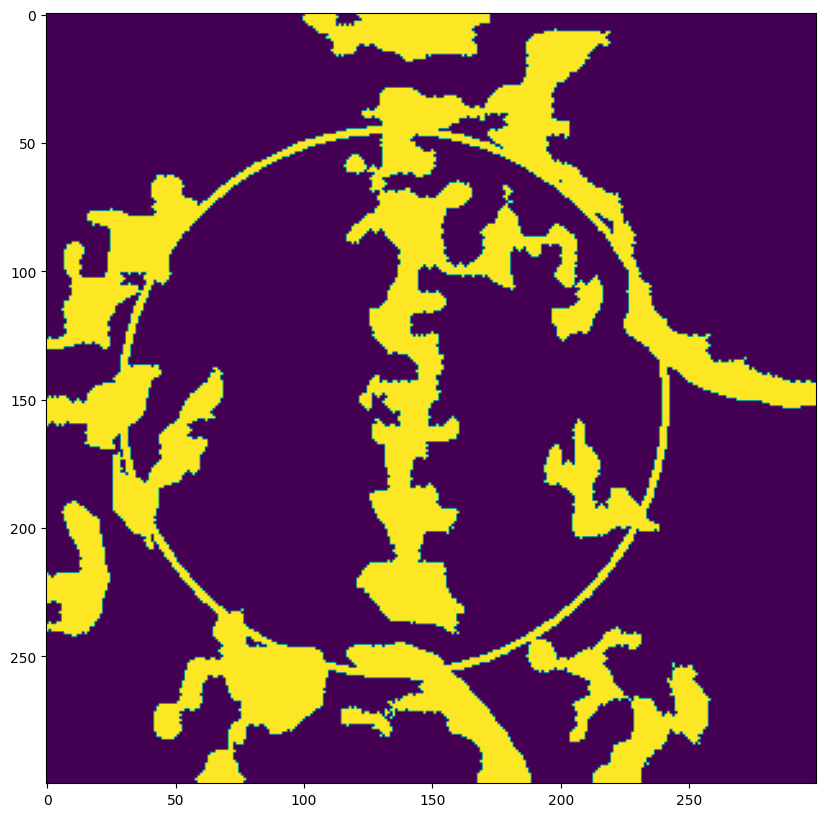

In [56]:
find_circle(hip, filter_contour)

In [57]:
# circles = cv2.HoughCircles(filter_contour,cv2.HOUGH_GRADIENT,1,1,param1=20,param2=10,minRadius=97,maxRadius=110)

# print(str(type(circles)) == "<class 'NoneType'>")
# print(filter_circle(circles))
# print(len(circles[0]))
# cimg = hip.copy()
# circles = np.uint16(np.around(circles))
# for i in circles[0,:]:
#     # draw the outer circle
#     cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
#     # draw the center of the circle
#     cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

# plt.figure(figsize=(10,10))
# plt.imshow(cimg, cmap="gray")

TypeError: 'NoneType' object is not subscriptable